In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# read dataset.csv file
dataset=pd.read_csv('/content/drive/MyDrive/mittwatt/dataset.csv',sep=';')
dataset

,temperature_2m,precipitation,weather_code,cloud_cover,wind_speed_10m,shortwave_radiation,price
0,-8.6,0.0,0.0,4.5,14.8,0.0,3.690
1,-9.4,0.0,0.0,0.0,14.8,0.0,5.778
2,-10.1,0.0,0.0,0.0,15.6,0.0,5.125
3,-10.6,0.0,0.0,4.5,15.9,0.0,5.230
4,-11.0,0.0,2.0,67.5,16.1,0.0,5.502
...,...,...,...,...,...,...,...
20658,2.2,0.0,3.0,100.0,14.8,14.0,1.911
20659,2.5,0.0,3.0,89.1,14.8,0.0,3.138
20660,2.3,0.0,2.0,52.2,16.8,0.0,3.138
20661,2.4,0.0,0.0,8.1,17.4,0.0,3.074


In [5]:
#renaming columns name because of difference in column name in project database HistoricalElectricityWeather table
dataset.columns = ['temperature', 'precipitation', 'weatherCodeId', 'cloudCover', 'windSpeed10m', 'shortwaveRadiation','price']


normalize the dataset

In [6]:
x=dataset.drop('price', axis=1)
y=dataset[['price']]

In [7]:
# Normalize the features
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(x)
X_normalized

array([[0.42170543, 0.        , 0.        , 0.045     , 0.45398773,
        0.        ],
       [0.40930233, 0.        , 0.        , 0.        , 0.45398773,
        0.        ],
       [0.39844961, 0.        , 0.        , 0.        , 0.47852761,
        0.        ],
       ...,
       [0.59069767, 0.        , 0.02666667, 0.522     , 0.51533742,
        0.        ],
       [0.59224806, 0.        , 0.        , 0.081     , 0.53374233,
        0.        ],
       [0.58604651, 0.        , 0.        , 0.099     , 0.51840491,
        0.        ]])

In [8]:
# Normalize the target
scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))
y_normalized

array([[0.18831725],
       [0.19564089],
       [0.1933505 ],
       ...,
       [0.18638111],
       [0.18615663],
       [0.18287713]])

In [10]:
# Save the scalers for further use
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

split dataset for train set and test set

In [11]:
# Split x into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.1, random_state=42)

In [12]:
# Print the shape of the resulting data sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18596, 6)
y_train shape: (18596, 1)
X_test shape: (2067, 6)
y_test shape: (2067, 1)


In [13]:
# Define the model
model = Sequential()

model.add(Dense(60, input_dim=X_normalized.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))


In [15]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [16]:
# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
465/465 [==============================] - 4s 4ms/step - loss: 0.1916 - mean_absolute_error: 0.2583 - val_loss: 0.0032 - val_mean_absolute_error: 0.0442
Epoch 2/100
465/465 [==============================] - 2s 3ms/step - loss: 0.0321 - mean_absolute_error: 0.1015 - val_loss: 0.0025 - val_mean_absolute_error: 0.0328
Epoch 3/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0107 - mean_absolute_error: 0.0610 - val_loss: 0.0023 - val_mean_absolute_error: 0.0330
Epoch 4/100
465/465 [==============================] - 2s 3ms/step - loss: 0.0051 - mean_absolute_error: 0.0461 - val_loss: 0.0023 - val_mean_absolute_error: 0.0322
Epoch 5/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0031 - mean_absolute_error: 0.0381 - val_loss: 0.0023 - val_mean_absolute_error: 0.0323
Epoch 6/100
465/465 [==============================] - 2s 3ms/step - loss: 0.0025 - mean_absolute_error: 0.0343 - val_loss: 0.0023 - val_mean_absolute_error: 0.0326
Epoch 7/10

In [17]:
# Extract loss and metric values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

In [18]:
#epochs= 100 lr=0.001 batch=32 hidden layer= 6 validation split = 0.3 with dropouts 0.3 BatchNormalization
print("\n Evaluate the new model against the test set:")
model.evaluate(x=X_train, y=y_train, batch_size=32)


 Evaluate the new model against the test set:
582/582 [==============================] - 1s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0300


[0.0020518749952316284, 0.03002961538732052]

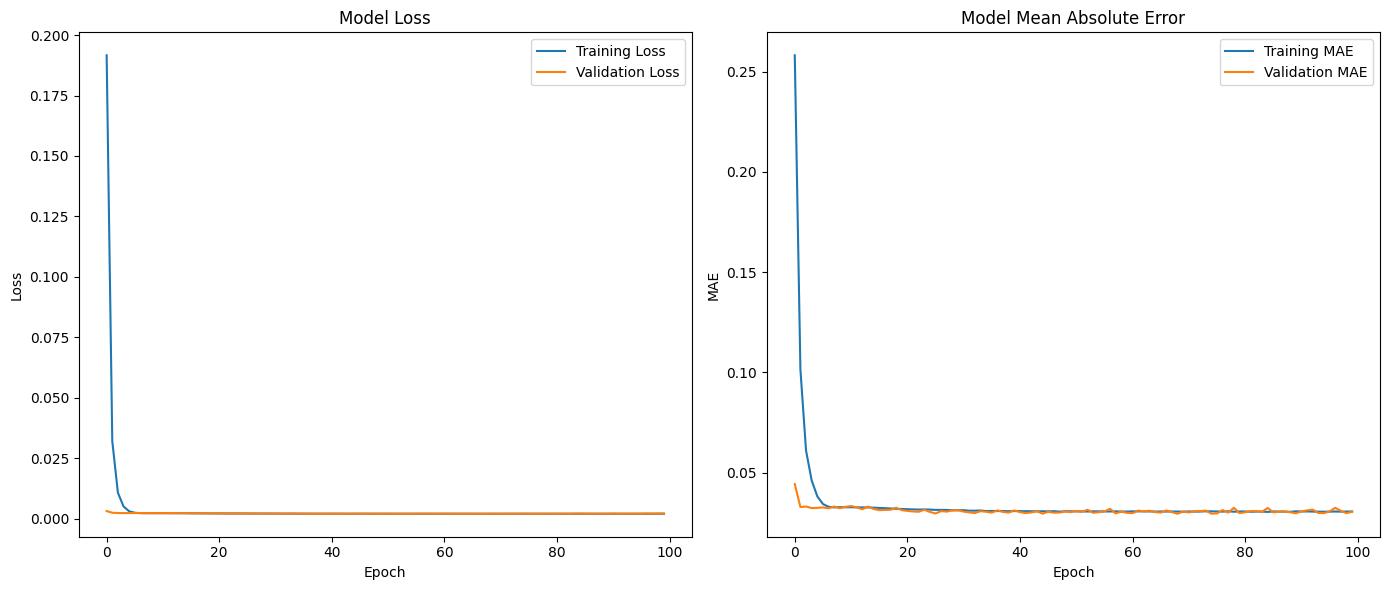

In [19]:
#epochs= 100 lr=0.001 batch=32 hidden layer= 6 validation split = 0.3 with dropouts 0.3 BatchNormalization
# Plot training & validation loss values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [20]:
# Save the model
model.save('original_electricity_price_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Prediction**

In [21]:
# Predicting with the model
predictions = model.predict(X_test)

65/65 [==============================] - 0s 1ms/step


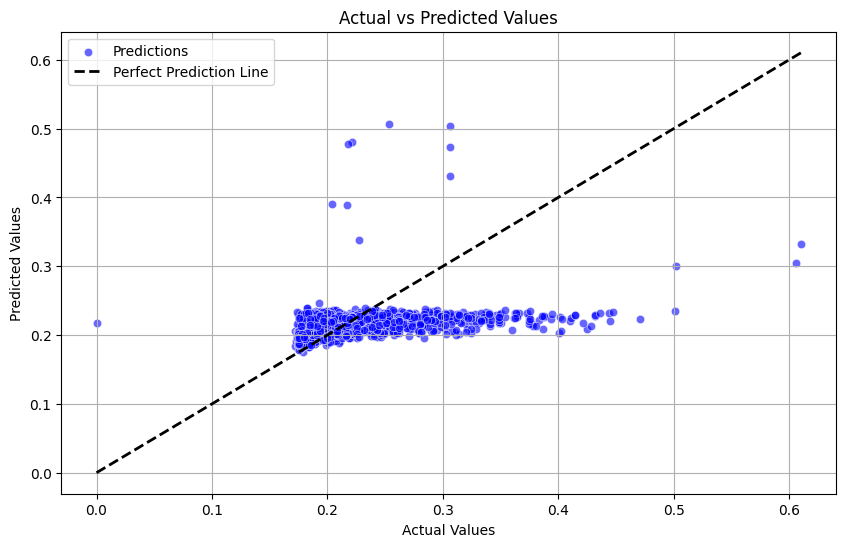

In [22]:
# Scatter Plot of Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

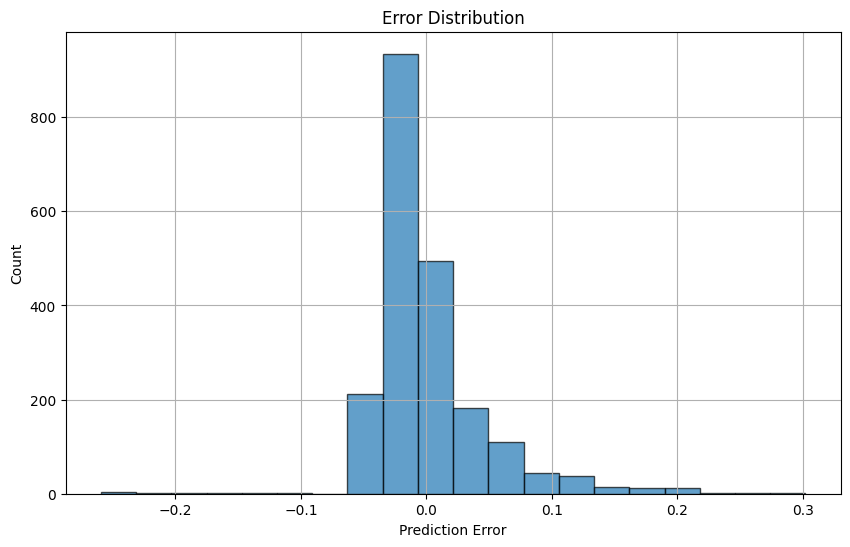

In [23]:
# Calculate the errors
errors = y_test - predictions

# Error Distribution Plot
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.grid(True)
plt.show()

# **Inverse to original price values**

In [24]:
# Inverse transform the predicted values to get the original scale
y_test_original = scaler_y.inverse_transform(y_test)
pred_original = scaler_y.inverse_transform(predictions)

In [25]:
# Create a DataFrame with prediction and actual value column
output_df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': predictions.flatten()
})
output_df

,Actual,Predicted
0,0.216668,0.201597
1,0.187493,0.210997
2,0.195402,0.214850
3,0.177304,0.191490
4,0.179892,0.204264
...,...,...
2062,0.262357,0.220491
2063,0.233995,0.223319
2064,0.247124,0.229428
2065,0.180026,0.196634


In [26]:
difference = y_test_original - pred_original
difference

array([[ 4.29680705],
       [-6.70113079],
       [-5.5445414 ],
       ...,
       [ 5.04513612],
       [-4.7352402 ],
       [21.75154787]])

In [27]:
difference.shape

(2067, 1)

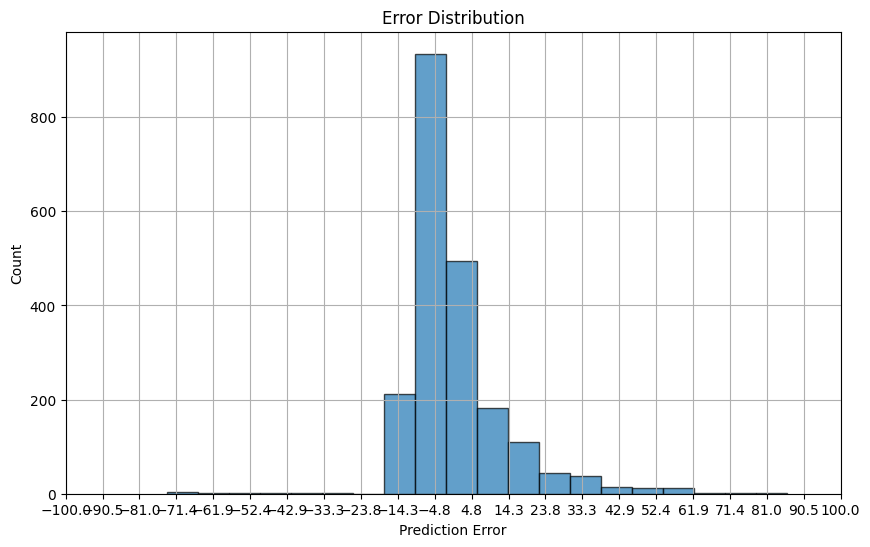

In [28]:
# Calculate the errors
errors = y_test_original - pred_original

# Error Distribution Plot
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Error Distribution')
# Get current x-ticks
x_ticks = plt.gca().get_xticks()

# Create a more detailed range of x-ticks
detailed_x_ticks = np.linspace(x_ticks[0], x_ticks[-1], num=2*len(x_ticks))

# Set the detailed x-ticks
plt.xticks(detailed_x_ticks)

plt.grid(True)
plt.show()


In [29]:
# Count the number of predictions with difference of these values
# Calculate the absolute values
y_test_abs = np.abs(y_test_original)
pred_abs = np.abs(pred_original)

# Calculate the differences
difference = y_test_abs - pred_abs

count_1 = np.count_nonzero(difference < 0.2);
count_2 = np.count_nonzero((difference < 0.5) & (difference >= 0.2 ));
count_3 = np.count_nonzero((difference >= 0.5) & (difference < 1.0));

print("Number of values less than 0.2:", count_1)
print("Number of values less than 0.5 and more than 0.2:", count_2)
print("Number of values less than 0.10 and more than 0.5:", count_3)

Number of values less than 0.2: 1320
Number of values less than 0.5 and more than 0.2: 23
Number of values less than 0.10 and more than 0.5: 35


Model evaluation with two evaluation metrices.


*   The loss value indicates the overall error of the model's predictions compared to the actual values. Lower loss indicates better model performance.
*   The mean_absolute_error (MAE) measures the average magnitude of errors in the predictions, without considering their direction (positive or negative). Lower MAE indicates more accurate predictions.




In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Model loss:", loss)
print("Model MAE:", mae)

65/65 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_absolute_error: 0.0291
Model loss: 0.002004077425226569
Model MAE: 0.029054321348667145


Here loss value of 0.002004077425226569 indicates that the average squared difference between the predicted values and the actual values is quite small. This suggests that this model's predictions are generally close to the actual target values.

An MAE value of 0.029054321348667145 means that, on average, your model's predictions are off by approximately 0.0317 units from the actual values.

Overall, these evaluation results suggest that the model's performance is much better than linear regression algorithm. The model predicted the target variable well but since we are predicting the price where very small difference is also makes a difference in long run. In next phase we can use advance machine learning algorithms which will predict the price with much accuracy.